### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [5]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados da IBM e a biblioteca matplotlib:

**a)** Faça um gráfico de dispersão (scatter plot) de tamanho (10,5), com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" na cor azul e com uma letra diferente da usual.

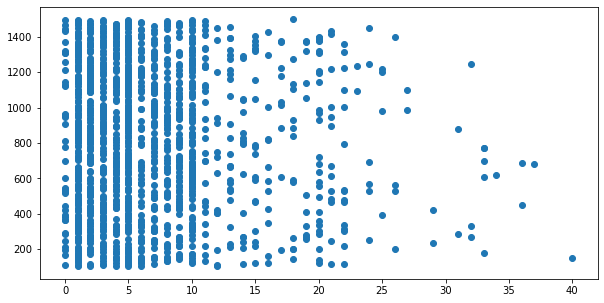

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1)

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

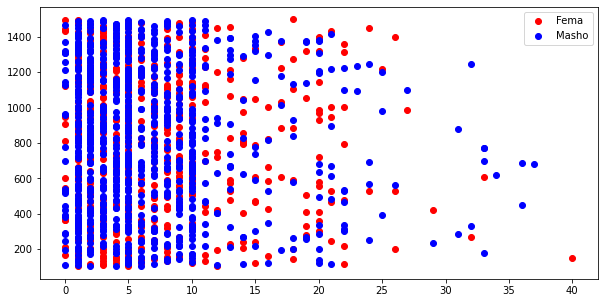

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1[df1['Gender'] == 'Female'], color='red', label='Fema')
ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1[df1['Gender'] == 'Male'], color='blue', label='Masho')

ax.legend()

**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 

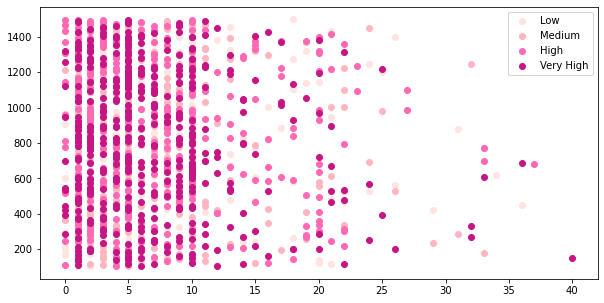

In [8]:
cores = {1: '#FFE4E1',
         2: '#FFB6C1',
         3: '#FF69B4',
         4: '#C71585'}

legenda = {1: 'Low', 
           2: 'Medium',
           3: 'High',
           4: 'Very High'}

fig, ax = plt.subplots(figsize=(10,5))
for i in range(len(df1['JobSatisfaction'].unique())):
    ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1[df1['JobSatisfaction'] == i+1], color=cores[i+1], label=legenda[i+1])


ax.legend()
plt.show()

## Exercício 2

**a)** Utilizando a base de dados de covid e a biblioteca matplotlib, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

In [9]:
df2.head(3)

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,5,0


In [10]:
df_agrupado = df2.groupby(['nome_drs', 'ano_mes'], as_index=False).sum()

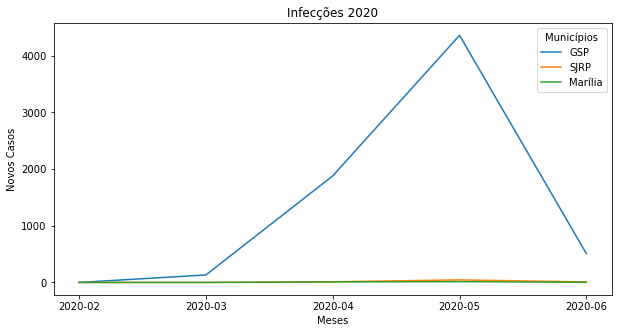

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('ano_mes', 'obitos_novos', data=df_agrupado[df_agrupado['nome_drs'] == 'Grande São Paulo'], label='GSP')
ax.plot('ano_mes', 'obitos_novos', data=df_agrupado[df_agrupado['nome_drs'] == 'São José do Rio Preto'], label='SJRP')
ax.plot('ano_mes', 'obitos_novos', data=df_agrupado[df_agrupado['nome_drs'] == 'Marília'], label='Marília')

ax.set_title('Infecções 2020')
ax.set_xlabel('Meses')
ax.set_ylabel('Novos Casos')
ax.legend(title='Municípios')
plt.show()

**b)** Repita o gráfico do item a trocando as cores dos DRS.

C:\Users\sauld\AppData\Local\Temp\ipykernel_18528\336427333.py:3: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.plot('ano_mes', 'obitos_novos', data=df2[df2['nome_munic'] == 'São José do Rio Preto'], color='red')


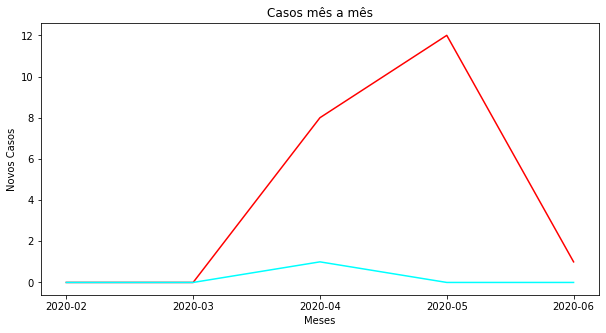

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('ano_mes', 'obitos_novos', data=df2[df2['nome_munic'] == 'Grande São Paulo'], color='purple')
ax.plot('ano_mes', 'obitos_novos', data=df2[df2['nome_munic'] == 'São José do Rio Preto'], color='red')
ax.plot('ano_mes', 'obitos_novos', data=df2[df2['nome_munic'] == 'Marília'], color='cyan')

ax.set_title('Casos mês a mês')
ax.set_xlabel('Meses')
ax.set_ylabel('Novos Casos')

plt.show()

**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.

In [20]:
df2 = df2.rename(columns={'ano_mes': 'mês'})
df2 = df2.replace({'2020-02': 'fevereiro', '2020-03': 'março', '2020-04': 'abril', '2020-05': 'maio', '2020-06': 'junho'})
df2['mês'] = pd.Categorical(df2['mês'], categories=['fevereiro', 'março', 'abril', 'maio', 'junho'], ordered=True)

In [22]:
df_agrupado = df2.groupby(['nome_drs', 'mês'], as_index=False).sum()

In [25]:
seg_trimestre = df_agrupado[(df_agrupado['mês'] == 'abril') | (df_agrupado['mês'] == 'maio') | (df_agrupado['mês'] == 'junho')]

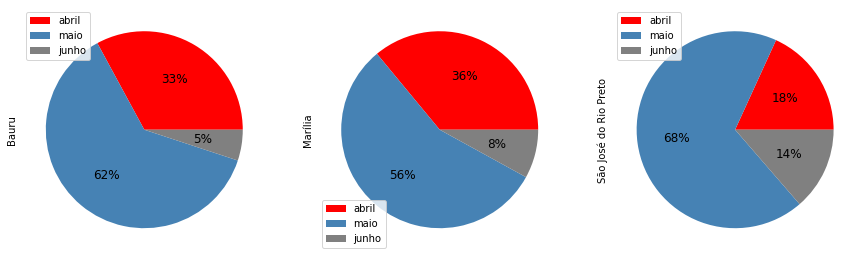

In [26]:
pizza = df_agrupado_seg_trimestre[
         (df_agrupado_seg_trimestre['nome_drs'] == 'Bauru') | 
         (df_agrupado_seg_trimestre['nome_drs'] == 'São José do Rio Preto') |
         (df_agrupado_seg_trimestre['nome_drs'] == 'Marília')
        ].pivot(index='mês', columns='nome_drs', values='obitos_novos')
pizza.plot(kind='pie', subplots=True, figsize=(15,12), autopct='%1.0f%%',
           fontsize=12, labeldistance=None, colors=['red',  'steelblue', 'gray'])
plt.show()

## Exercício 3:
Utilizando a base de dados de covid e a biblioteca matplotlib:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

## Exercício 4:

**a)** Utilizando a base de dados da IBM e a biblioteca matplotlib, crie um histograma para as idades dos funcionários, separando por gênero.

**b)** Faça agora um boxplot das idades, por gênero.